In [1]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
import scanpy as sc

In [6]:
data = sc.read_csv('/content/drive/MyDrive/samples/GSM5226574_C51ctr_raw_counts.csv').T
data

AnnData object with n_obs × n_vars = 6099 × 34546

In [3]:
!pip install scvi-tools

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of orbax-checkpoint to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of orbax-checkpoint to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.2/503.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 5.1 MB/s eta 0:00:00


In [5]:
import scvi

/usr/local/lib/python3.11/dist-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/usr/local/lib/python3.11/dist-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [7]:
sc.pp.filter_genes(data, min_cells=10)
data

AnnData object with n_obs × n_vars = 6099 × 19896
    var: 'n_cells'

In [8]:
sc.pp.highly_variable_genes(data, n_top_genes=2000, subset = True, flavor = 'seurat_v3')

In [9]:
scvi.model.SCVI.setup_anndata(data)
vae = scvi.model.SCVI(data)
vae.train()

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more det

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


In [10]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incr

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.299. Signaling Trainer to stop.


In [11]:
df = solo.predict()
df['prediction'] = solo.predict(soft=False)
#df.index = df.index.map(lambda x: x[:-1])
df

/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet,prediction
TAGGTACCATGGCCAC-1_1,0.880625,0.119375,doublet
ATTCACTGTAACAGGC-1_1,0.950889,0.049111,doublet
TAACTTCCAACCACGC-1_1,0.646874,0.353126,doublet
TTGGGTACACGACAAG-1_1,0.818559,0.181441,doublet
AGGCCACAGAGTCACG-1_1,0.907111,0.092889,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1_1,0.083151,0.916849,singlet
CACTGGGGTCTACGTA-1_1,0.000941,0.999059,singlet
CATACTTGTAGAGGAA-1_1,0.005091,0.994909,singlet
TTTGGTTTCCACGGAC-1_1,0.000309,0.999691,singlet


In [12]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1199,1199
singlet,4900,4900


In [13]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1_1,0.880625,0.119375,doublet,0.761250
ATTCACTGTAACAGGC-1_1,0.950889,0.049111,doublet,0.901778
TAACTTCCAACCACGC-1_1,0.646874,0.353126,doublet,0.293748
TTGGGTACACGACAAG-1_1,0.818559,0.181441,doublet,0.637118
AGGCCACAGAGTCACG-1_1,0.907111,0.092889,doublet,0.814222
...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,0.083151,0.916849,singlet,-0.833698
CACTGGGGTCTACGTA-1_1,0.000941,0.999059,singlet,-0.998117
CATACTTGTAGAGGAA-1_1,0.005091,0.994909,singlet,-0.989819
TTTGGTTTCCACGGAC-1_1,0.000309,0.999691,singlet,-0.999382


In [14]:
import seaborn as sns

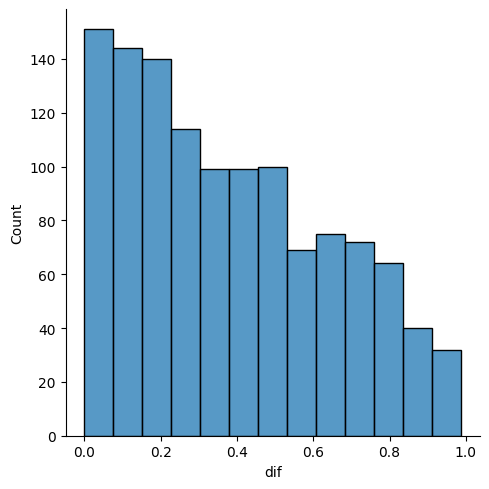

In [15]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [16]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.2)]
doublets

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1_1,0.880625,0.119375,doublet,0.761250
ATTCACTGTAACAGGC-1_1,0.950889,0.049111,doublet,0.901778
TAACTTCCAACCACGC-1_1,0.646874,0.353126,doublet,0.293748
TTGGGTACACGACAAG-1_1,0.818559,0.181441,doublet,0.637118
AGGCCACAGAGTCACG-1_1,0.907111,0.092889,doublet,0.814222
...,...,...,...,...
CTCCACAGTCCCACGA-1_1,0.662458,0.337542,doublet,0.324916
TGCCGAGCATTCTCTA-1_1,0.717597,0.282403,doublet,0.435193
GTGAGCCAGCGGCTCT-1_1,0.686121,0.313879,doublet,0.372241
GGAGGTAGTTAAGCAA-1_1,0.664673,0.335327,doublet,0.329345


In [18]:
data = sc.read_csv("/content/drive/MyDrive/samples/GSM5226574_C51ctr_raw_counts.csv").T

In [19]:
data.obs['doublet'] = data.obs.index.isin(doublets.index)

In [20]:
data.obs

,doublet
TAGGTACCATGGCCAC-1_1,True
ATTCACTGTAACAGGC-1_1,True
TAACTTCCAACCACGC-1_1,True
TTGGGTACACGACAAG-1_1,True
AGGCCACAGAGTCACG-1_1,True
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [21]:
data = data[~data.obs.doublet]

In [22]:
data

View of AnnData object with n_obs × n_vars = 5278 × 34546
    obs: 'doublet'

In [23]:
data.var['mt'] = data.var.index.str.startswith('MT-')

<ipython-input-23-f71222283f07>:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  data.var['mt'] = data.var.index.str.startswith('MT-')


In [24]:
data.var

,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [25]:
import pandas as pd

In [26]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [27]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header=None)

In [28]:
data.var['ribo'] = data.var_names.isin(ribo_genes[0].values)

In [29]:
data.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


In [30]:
sc.pp.calculate_qc_metrics(data, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [31]:
data.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TTACCGCCACTCAGAT-1_1,False,4144,11369.0,39.0,0.343038,5.0,0.043979
TTGGTTTTCCTAGCTC-1_1,False,3902,11472.0,463.0,4.035913,13.0,0.113319
CACTTCGCAGTACTAC-1_1,False,3244,8059.0,253.0,3.139347,14.0,0.173719
CTGTAGATCAACGTGT-1_1,False,3108,7602.0,1.0,0.013154,1.0,0.013154
CCTTGTGCAGAGGGTT-1_1,False,3101,7654.0,575.0,7.512412,9.0,0.117586
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [32]:
data.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
LINC02665,False,False,0,0.000000,100.000000,0.0
AC013799.1,False,False,0,0.000000,100.000000,0.0
OR5A2,False,False,0,0.000000,100.000000,0.0
OR4D11,False,False,0,0.000000,100.000000,0.0
FGF3,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,3749,2.685676,28.969307,14175.0
NEAT1,False,False,3812,4.654793,27.775673,24568.0
MBNL1,False,False,3822,2.564229,27.586207,13534.0
ZBTB20,False,False,3949,2.317734,25.179992,12233.0


In [33]:
sc.pp.filter_genes(data, min_cells=3)

In [34]:
data.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AC103739.3,False,False,3,0.000568,99.943160,3.0,3
LINC01585,False,False,3,0.000568,99.943160,3.0,3
AC068831.4,False,False,3,0.000568,99.943160,3.0,3
AC068831.1,False,False,3,0.000568,99.943160,3.0,3
VPS33B-DT,False,False,3,0.000568,99.943160,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,3749,2.685676,28.969307,14175.0,3749
NEAT1,False,False,3812,4.654793,27.775673,24568.0,3812
MBNL1,False,False,3822,2.564229,27.586207,13534.0,3822
ZBTB20,False,False,3949,2.317734,25.179992,12233.0,3949


In [35]:
data.obs.sort_values('n_genes_by_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGGTTTCTGGCTGG-1_1,False,276,419.0,1.0,0.238663,1.0,0.238663
CGTGCTTCAAAGGGCT-1_1,False,277,432.0,41.0,9.490741,0.0,0.000000
TGACAGTTCTAAACGC-1_1,False,278,414.0,0.0,0.000000,0.0,0.000000
CTCTGGTCACGACGAA-1_1,False,285,407.0,0.0,0.000000,0.0,0.000000
GTAAGTCGTATCGCGC-1_1,False,289,430.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...
TACAACGGTGGCTGAA-1_1,False,3176,7001.0,45.0,0.642765,1.0,0.014284
CACTTCGCAGTACTAC-1_1,False,3244,8059.0,253.0,3.139347,14.0,0.173719
TCCTTCTCAGTTTCAG-1_1,False,3246,7417.0,2.0,0.026965,1.0,0.013483
TTGGTTTTCCTAGCTC-1_1,False,3902,11472.0,463.0,4.035913,13.0,0.113319


In [ ]:
# sc.pp.filter_cells(data, min_genes=200)

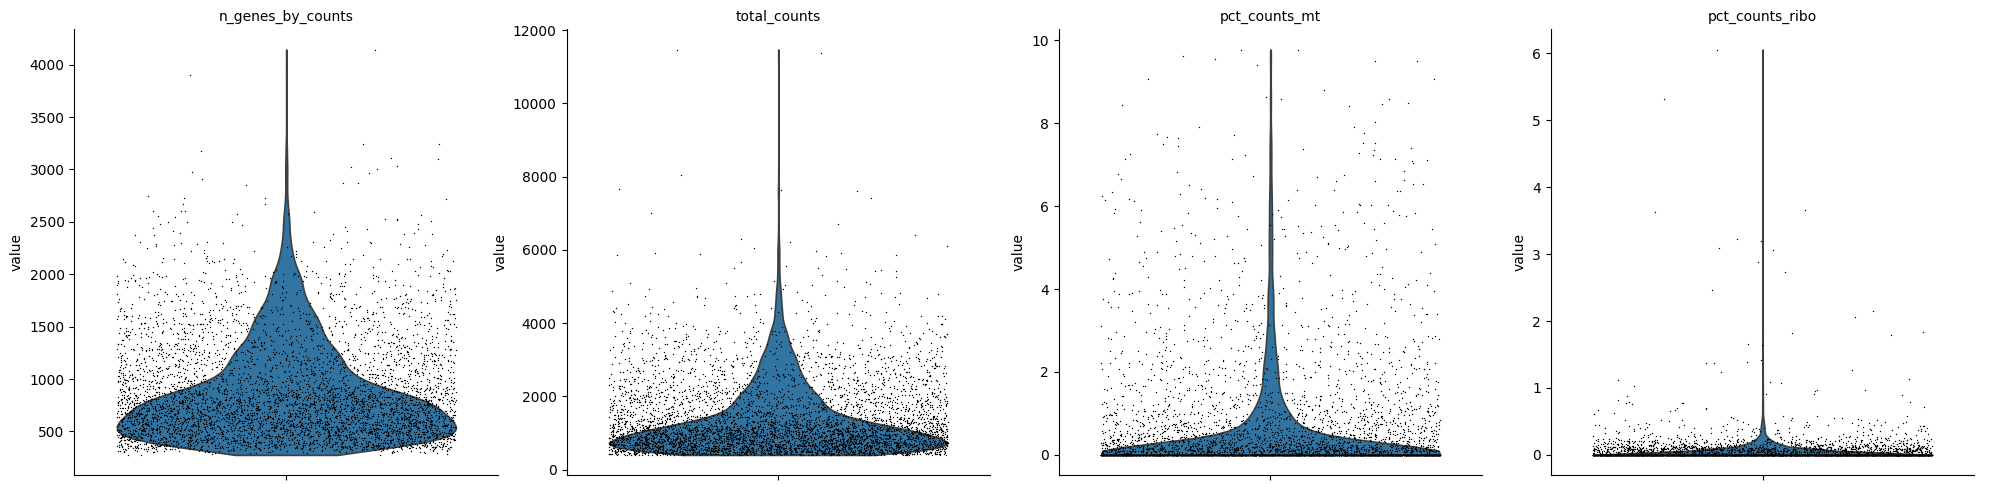

In [36]:
sc.pl.violin(data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], jitter=0.4, multi_panel=True)

In [37]:
import numpy as np

In [38]:
upper_lim = np.quantile(data.obs.n_genes_by_counts.values, .98)

In [39]:
upper_lim

np.float64(2117.0)

In [40]:
data = data[data.obs.n_genes_by_counts < upper_lim]

In [41]:
data.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
GATGACTGTACCCAGC-1_1,False,2007,4598.0,6.0,0.130492,3.0,0.065246
AGGGCCTGTTGCTTGA-1_1,False,1876,4493.0,2.0,0.044514,2.0,0.044514
TGGGCTGTCTACTTCA-1_1,False,2051,4406.0,6.0,0.136178,0.0,0.000000
CCAAGCGCAAACTGCT-1_1,False,2099,4375.0,0.0,0.000000,0.0,0.000000
TAAGCACTCTCACGAA-1_1,False,1956,4298.0,2.0,0.046533,5.0,0.116333
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [42]:
data = data[data.obs.pct_counts_mt < 20]

In [43]:
data.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
GATGACTGTACCCAGC-1_1,False,2007,4598.0,6.0,0.130492,3.0,0.065246
AGGGCCTGTTGCTTGA-1_1,False,1876,4493.0,2.0,0.044514,2.0,0.044514
TGGGCTGTCTACTTCA-1_1,False,2051,4406.0,6.0,0.136178,0.0,0.000000
CCAAGCGCAAACTGCT-1_1,False,2099,4375.0,0.0,0.000000,0.0,0.000000
TAAGCACTCTCACGAA-1_1,False,1956,4298.0,2.0,0.046533,5.0,0.116333
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [44]:
data = data[data.obs.pct_counts_ribo < 2]

In [45]:
data.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
GATGACTGTACCCAGC-1_1,False,2007,4598.0,6.0,0.130492,3.0,0.065246
AGGGCCTGTTGCTTGA-1_1,False,1876,4493.0,2.0,0.044514,2.0,0.044514
TGGGCTGTCTACTTCA-1_1,False,2051,4406.0,6.0,0.136178,0.0,0.000000
CCAAGCGCAAACTGCT-1_1,False,2099,4375.0,0.0,0.000000,0.0,0.000000
TAAGCACTCTCACGAA-1_1,False,1956,4298.0,2.0,0.046533,5.0,0.116333
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [46]:
sc.pp.normalize_total(data, target_sum=1e4)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [47]:
data.X.sum(axis=1)

array([10000.001, 10000.   , 10000.   , ..., 10000.   , 10000.   ,
        9999.999], dtype=float32)

In [48]:
sc.pp.log1p(data)

In [49]:
data.raw = data

In [50]:
sc.pp.highly_variable_genes(data, n_top_genes=2000)

In [51]:
data.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,5,0.000947,99.905267,5.0,5,True,0.011068,2.815561,1.322643
AL627309.5,False,False,23,0.004358,99.564229,23.0,23,False,0.027875,2.386942,-0.022866
AL627309.4,False,False,3,0.000568,99.943160,3.0,3,False,0.002693,1.702918,-2.170138
LINC01409,False,False,204,0.041682,96.134900,220.0,204,False,0.264648,2.368857,-0.079640
FAM87B,False,False,5,0.000947,99.905267,5.0,5,False,0.006729,1.986492,-1.279949
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,107,0.020652,97.972717,109.0,107,False,0.159813,2.436742,0.133465
AL592183.1,False,False,781,0.173930,85.202728,918.0,781,False,0.879904,2.541328,-0.399440
AC240274.1,False,False,126,0.024252,97.612732,128.0,126,False,0.152442,2.341298,-0.166152
AC007325.4,False,False,4,0.000758,99.924214,4.0,4,False,0.002726,1.662110,-2.298241


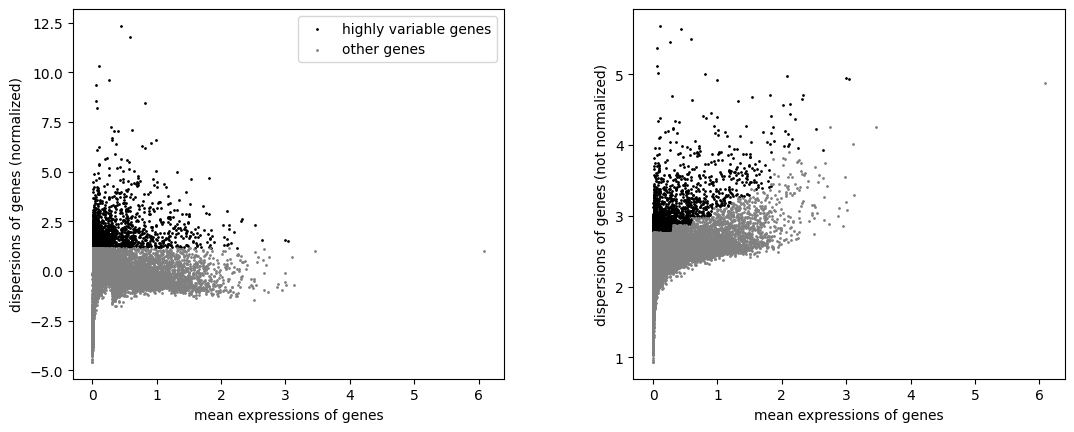

In [52]:
sc.pl.highly_variable_genes(data)

In [53]:
data = data[:, data.var.highly_variable]

In [54]:
data

View of AnnData object with n_obs × n_vars = 5158 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [55]:
sc.pp.regress_out(data, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:710: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:648: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  data[i] -= regressor[i] @ coeff
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:648: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  data[i] -= regressor[i] @ coeff


In [56]:
sc.pp.scale(data, max_value=10)

In [57]:
sc.tl.pca(data, svd_solver='arpack')

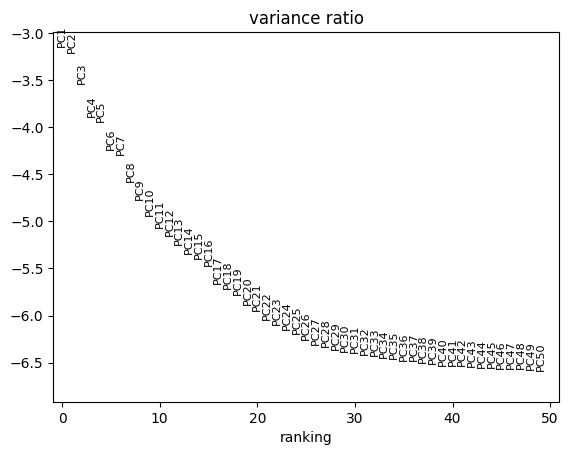

In [58]:
sc.pl.pca_variance_ratio(data, log=True, n_pcs = 50)

In [60]:
sc.pp.neighbors(data, n_pcs=30)

In [61]:
data.obsp['connectivities']

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 105878 stored elements and shape (5158, 5158)>

In [62]:
sc.tl.umap(data)

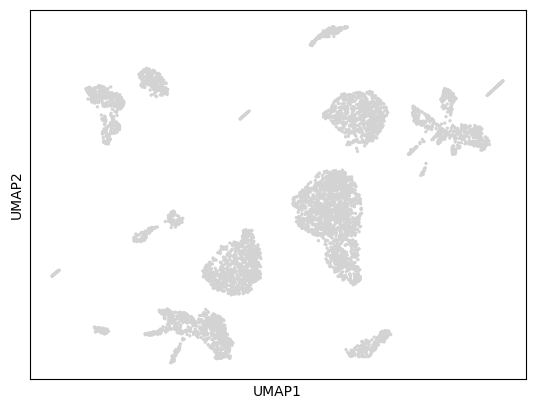

In [63]:
sc.pl.umap(data)

In [64]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.8 MB/s eta 0:00:00


In [65]:
sc.tl.leiden(data, resolution=0.5)

<ipython-input-65-fa49d09ed045>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(data, resolution=0.5)


In [66]:
data.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
GATGACTGTACCCAGC-1_1,False,2007,4598.0,6.0,0.130492,3.0,0.065246,2
AGGGCCTGTTGCTTGA-1_1,False,1876,4493.0,2.0,0.044514,2.0,0.044514,2
TGGGCTGTCTACTTCA-1_1,False,2051,4406.0,6.0,0.136178,0.0,0.000000,1
CCAAGCGCAAACTGCT-1_1,False,2099,4375.0,0.0,0.000000,0.0,0.000000,2
TAAGCACTCTCACGAA-1_1,False,1956,4298.0,2.0,0.046533,5.0,0.116333,2
...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000,9
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827,4


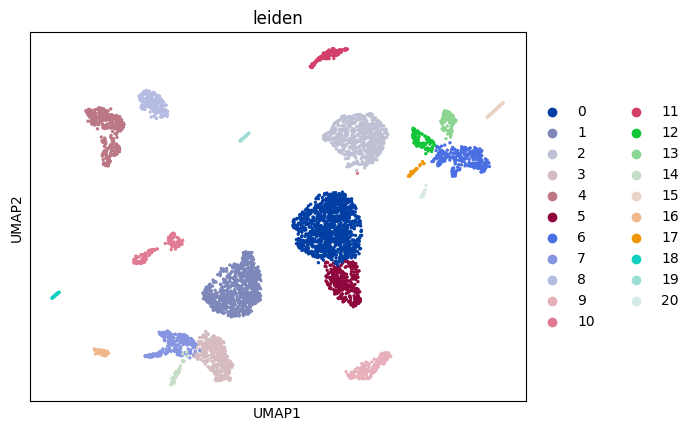

In [67]:
sc.pl.umap(data, color=['leiden'])

In [68]:
def pp(csv_path):
    adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]

    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[1] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'

    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]


    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]

    return adata

In [69]:
import os
import re

In [71]:
out=[]
lists=[]
path = "/content/drive/MyDrive/samples/"
pattern = r".*\.csv$"
for file in os.listdir(path):
  if re.search(pattern, file):
    lists.append(file)
for names in lists:
  out.append(pp('/content/drive/MyDrive/samples/' + names))

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incr

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.315. Signaling Trainer to stop.


/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:170: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incr

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.341. Signaling Trainer to stop.


/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:170: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incr

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.269. Signaling Trainer to stop.


/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:170: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incr

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.200. Signaling Trainer to stop.


/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:170: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incr

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.311. Signaling Trainer to stop.


/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:170: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incr

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.297. Signaling Trainer to stop.


/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:170: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


In [72]:
data = sc.concat(out)

In [73]:
data.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CTGGTCTTCCATGCAA-1_2,C52ctr,False,2339,2339,7657.0,0.0,0.0,2.0,0.026120
AGGATAAAGCCGCACT-1_2,C52ctr,False,2536,2536,7023.0,0.0,0.0,18.0,0.256301
GGGAGATCAGCAGTCC-1_2,C52ctr,False,2745,2745,6757.0,0.0,0.0,13.0,0.192393
TACCTGCAGCATCCCG-1_2,C52ctr,False,2433,2433,6663.0,0.0,0.0,6.0,0.090050
TATATCCAGCTCCCTT-1_2,C52ctr,False,2460,2460,6562.0,0.0,0.0,5.0,0.076196
...,...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,C51ctr,False,355,355,410.0,0.0,0.0,0.0,0.000000
CACTGGGGTCTACGTA-1_1,C51ctr,False,346,346,403.0,0.0,0.0,0.0,0.000000
CATACTTGTAGAGGAA-1_1,C51ctr,False,360,360,410.0,0.0,0.0,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,C51ctr,False,299,299,405.0,0.0,0.0,2.0,0.493827


In [74]:
sc.pp.filter_genes(data, min_cells=10)

In [75]:
data.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
from scipy.sparse import csr_matrix

In [77]:
data.X = csr_matrix(data.X)

In [78]:
data.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 22259958 stored elements and shape (26168, 24545)>

In [79]:
data.write_h5ad('combined.h5ad')

In [ ]:
data = sc.read_h5ad('combined.h5ad')
data

AnnData object with n_obs × n_vars = 5686 × 17740
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [80]:
data.obs.groupby('Sample').count()

<ipython-input-80-e72b78d90077>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.obs.groupby('Sample').count()


,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
Sample,,,,,,,,
C51ctr,5960,5960,5960,5960,5960,5960,5960,5960
C52ctr,4415,4415,4415,4415,4415,4415,4415,4415
L17cov,4341,4341,4341,4341,4341,4341,4341,4341
L18cov,2633,2633,2633,2633,2633,2633,2633,2633
L19cov,2429,2429,2429,2429,2429,2429,2429,2429
L22cov,6390,6390,6390,6390,6390,6390,6390,6390


In [81]:
data.layers['counts'] = data.X.copy()

In [82]:
sc.pp.normalize_total(data, target_sum=1e4)
sc.pp.log1p(data)
data.raw = data

In [83]:
data.obs.head()

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CTGGTCTTCCATGCAA-1_2,C52ctr,False,2339,2339,7657.0,0.0,0.0,2.0,0.026120
AGGATAAAGCCGCACT-1_2,C52ctr,False,2536,2536,7023.0,0.0,0.0,18.0,0.256301
GGGAGATCAGCAGTCC-1_2,C52ctr,False,2745,2745,6757.0,0.0,0.0,13.0,0.192393
TACCTGCAGCATCCCG-1_2,C52ctr,False,2433,2433,6663.0,0.0,0.0,6.0,0.090050
TATATCCAGCTCCCTT-1_2,C52ctr,False,2460,2460,6562.0,0.0,0.0,5.0,0.076196


In [84]:
sc.pp.highly_variable_genes(data, n_top_genes=2000, subset = True, layer = 'counts', flavor= 'seurat_v3', batch_key="Sample")

In [85]:
data

AnnData object with n_obs × n_vars = 26168 × 2000
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg'
    layers: 'counts'

if different batch then add batch

In [86]:
scvi.model.SCVI.setup_anndata(data, layer='counts', categorical_covariate_keys=['Sample'], continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [87]:
model = scvi.model.SCVI(data)

In [88]:
model.train()

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training:   0%|          | 0/306 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=306` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=306` reached.


In [89]:
data.obsm['X_scVI'] = model.get_latent_representation()

In [90]:
data.layers['scvi_normalized'] = model.get_normalized_expression(library_size=1e4)

In [91]:
sc.pp.neighbors(data, use_rep = 'X_scVI')

In [92]:
sc.tl.umap(data)

In [93]:
sc.tl.leiden(data, resolution=0.8)

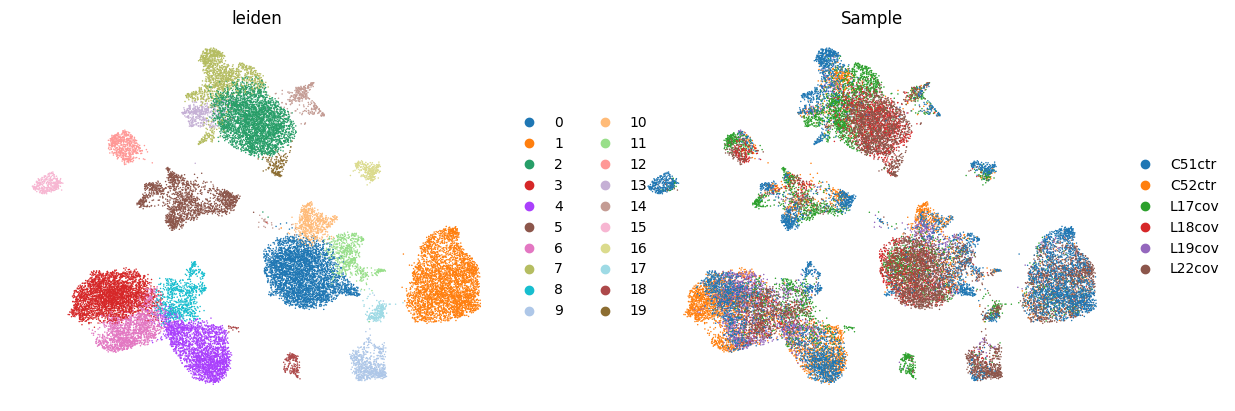

In [94]:
sc.pl.umap(data, color = ['leiden', 'Sample'], frameon=False)

In [95]:
data.write_h5ad('integrated.h5ad')

In [96]:
sc.tl.rank_genes_groups(data, 'leiden')

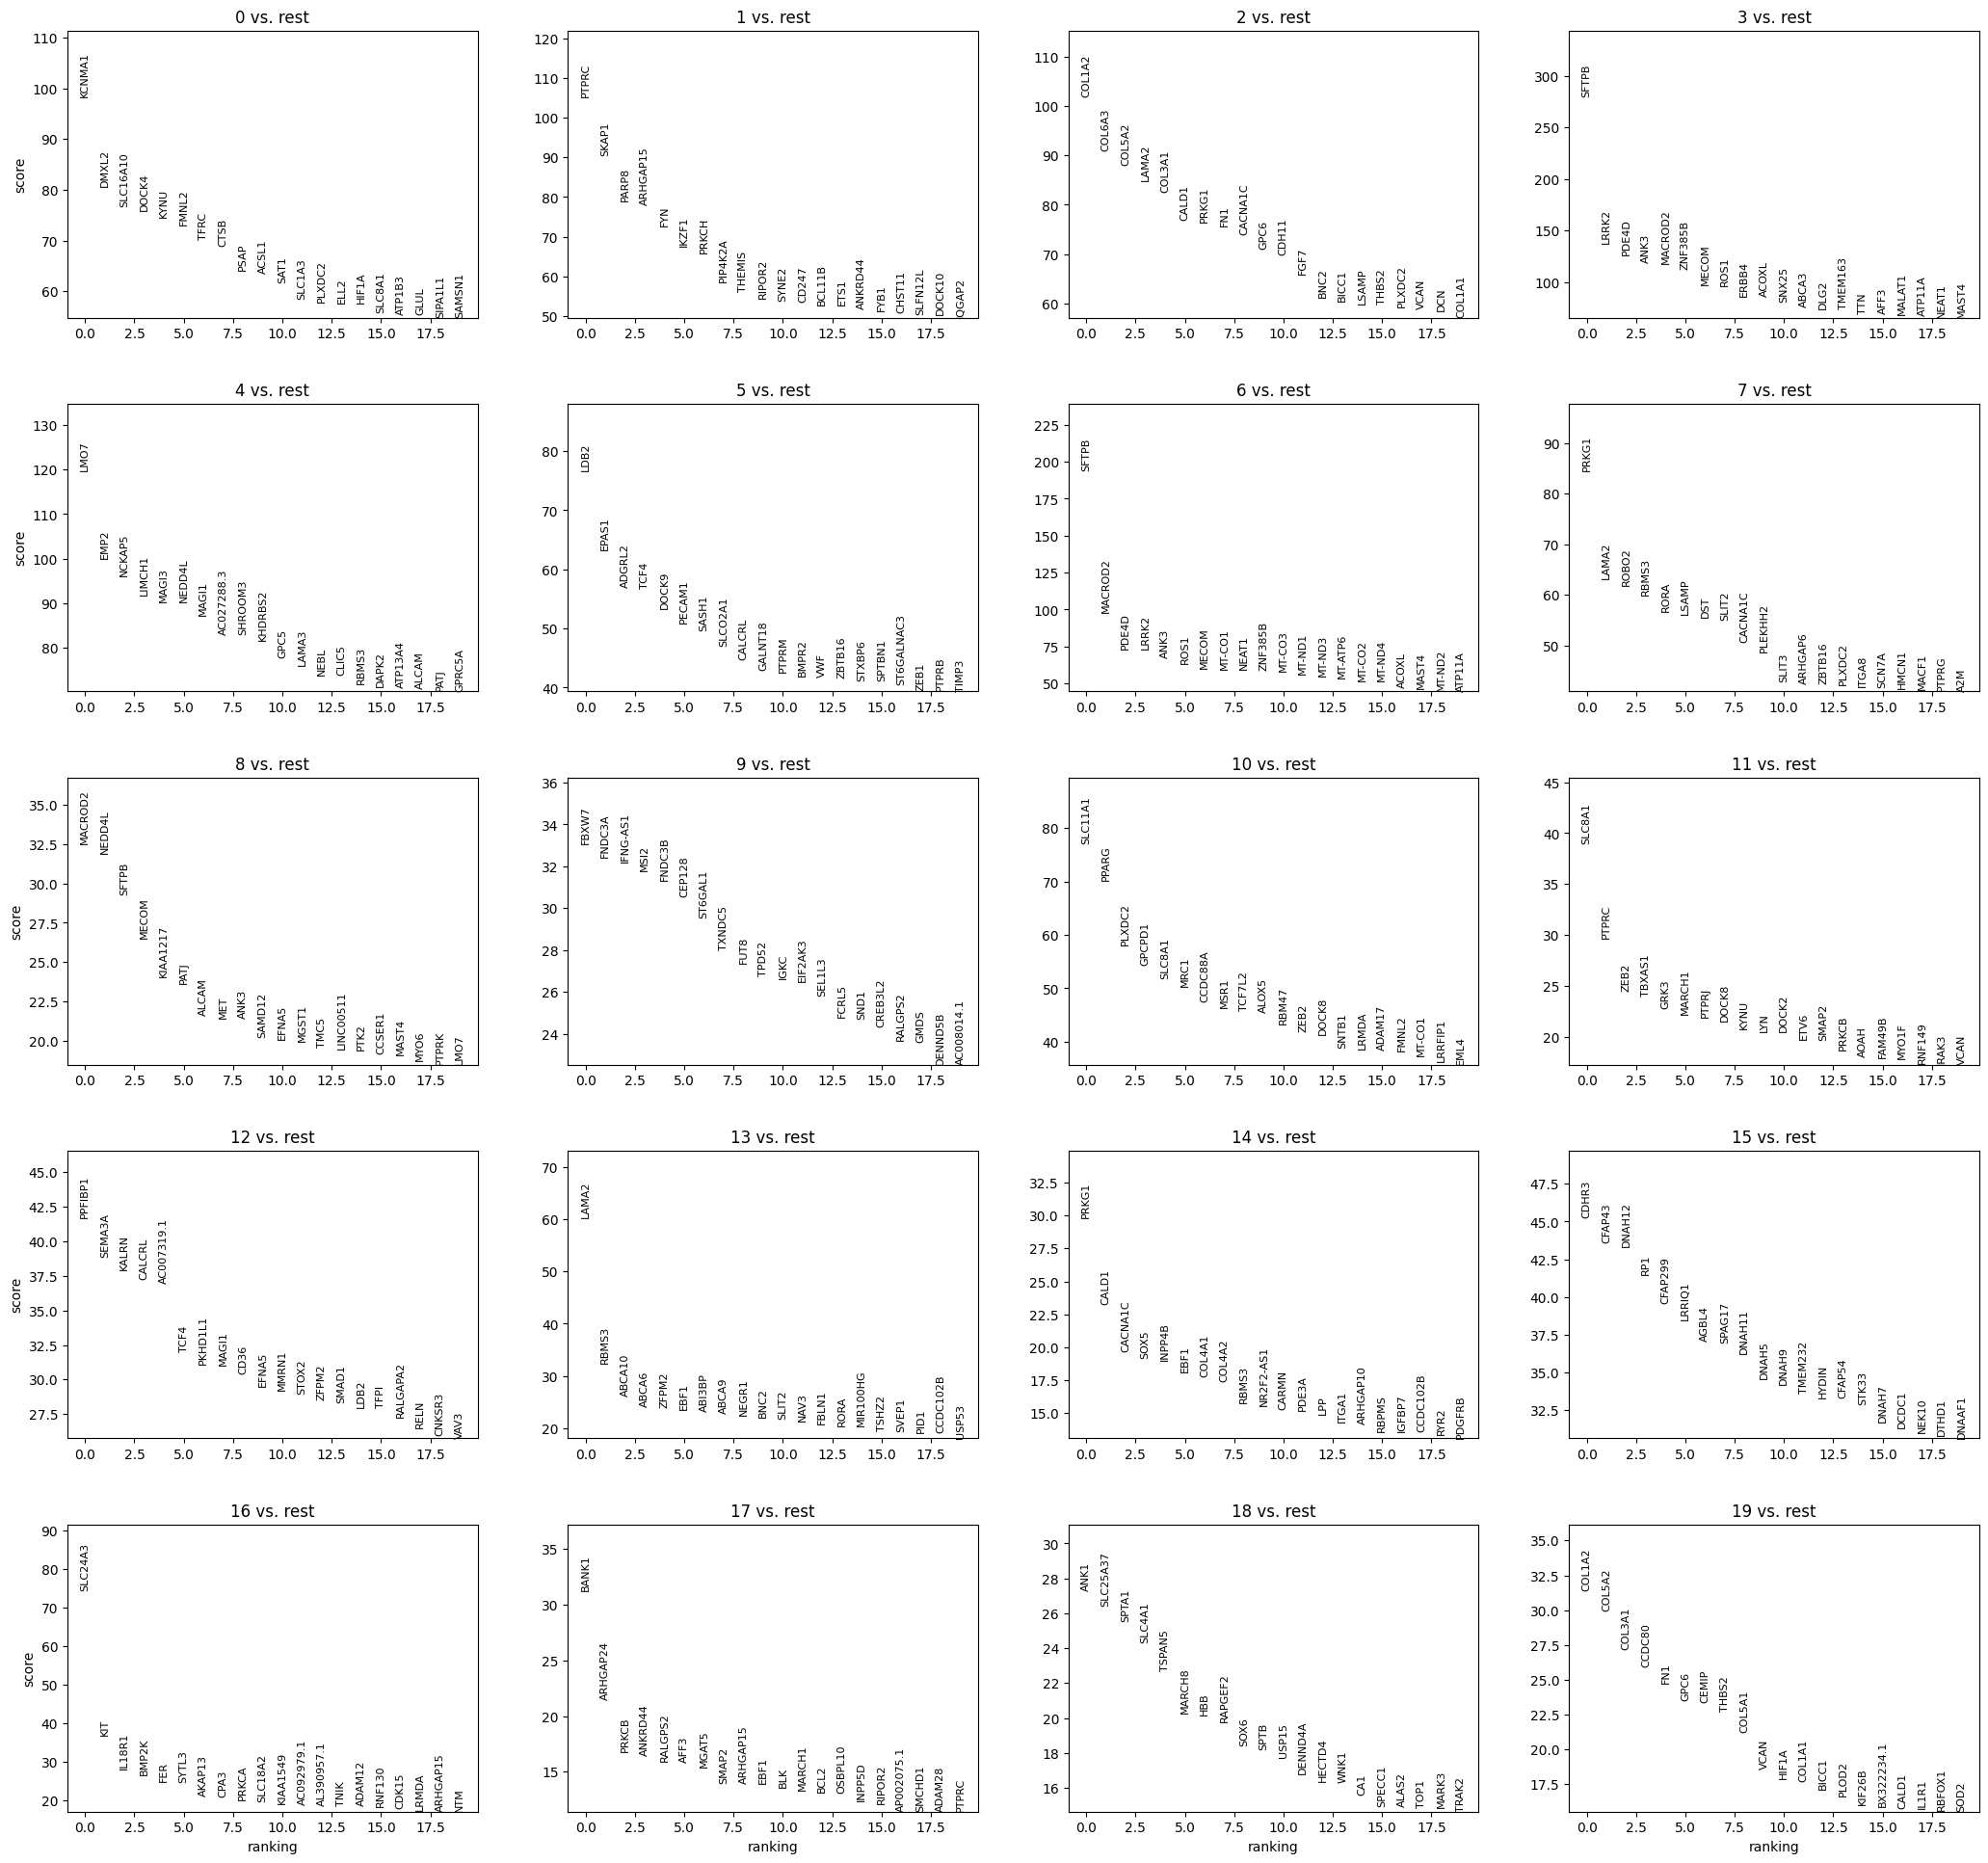

In [97]:
sc.pl.rank_genes_groups(data, n_genes=20, sharey=False)

In [98]:
markers = sc.get.rank_genes_groups_df(data, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,KCNMA1,98.295326,7.054340,0.000000,0.000000
1,0,DMXL2,80.590805,4.907259,0.000000,0.000000
2,0,SLC16A10,76.747902,6.142965,0.000000,0.000000
3,0,DOCK4,75.973824,3.203844,0.000000,0.000000
4,0,KYNU,74.576706,5.677003,0.000000,0.000000
...,...,...,...,...,...,...
467698,19,HS3ST3A1,2.212322,2.047584,0.028264,0.049046
467699,19,AL049552.1,2.211482,2.832187,0.028326,0.049149
467700,19,KLHDC2,2.207881,0.960258,0.028572,0.049561
467701,19,CPXM1,2.205873,3.703183,0.028725,0.049813


In [99]:
markers_scvi = model.differential_expression(groupby='leiden')
markers_scvi

DE...:   0%|          | 0/20 [00:00<?, ?it/s]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
SLC16A10,0.9742,0.0258,3.631242,0.014767,0.000489,0.008824,0.25,5.852964,5.888342,2.133038,...,2.355964,0.111452,0.668964,0.051395,170.376328,3.051674,True,0 vs Rest,0,Rest
KCNMA1,0.9740,0.0260,3.623314,0.022274,0.000779,0.008824,0.25,6.209394,6.376656,2.343156,...,3.666065,0.115918,0.768089,0.040322,244.553574,4.072806,True,0 vs Rest,0,Rest
CTSB,0.9600,0.0400,3.178054,0.009067,0.000395,0.008824,0.25,5.913963,6.137215,2.224885,...,1.681679,0.075999,0.611450,0.037732,97.846169,2.314871,True,0 vs Rest,0,Rest
MSR1,0.9484,0.0516,2.911254,0.005878,0.000420,0.008824,0.25,6.044784,6.379373,2.373543,...,0.936662,0.170843,0.458256,0.033758,56.069973,3.526131,True,0 vs Rest,0,Rest
SLC1A3,0.9356,0.0644,2.676074,0.006914,0.000222,0.008824,0.25,6.569834,6.920823,2.300281,...,1.226351,0.047242,0.521071,0.022907,80.832047,1.555254,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TIMD4,0.0000,1.0000,-0.000000,0.000002,0.000015,0.009540,0.25,-0.678601,-0.361880,1.029070,...,0.000000,0.001654,0.000000,0.001577,0.000000,0.105954,False,19 vs Rest,19,Rest
MYOZ3,0.0000,1.0000,-0.000000,0.000025,0.000013,0.009540,0.25,0.756312,0.863297,1.117397,...,0.000000,0.001693,0.000000,0.001616,0.000000,0.081861,False,19 vs Rest,19,Rest
PCYOX1L,0.0000,1.0000,-0.000000,0.000017,0.000055,0.009540,0.25,-0.692306,-0.509789,1.529905,...,0.005814,0.004308,0.005814,0.004193,0.121886,0.333193,False,19 vs Rest,19,Rest
SPINK1,0.0000,1.0000,-0.000000,0.000004,0.000010,0.009540,0.25,-0.157940,0.021290,0.986106,...,0.000000,0.001385,0.000000,0.001308,0.000000,0.062370,False,19 vs Rest,19,Rest


In [100]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
SLC16A10,0.9742,0.0258,3.631242,0.014767,0.000489,0.008824,0.25,5.852964,5.888342,2.133038,...,2.355964,0.111452,0.668964,0.051395,170.376328,3.051674,True,0 vs Rest,0,Rest
KCNMA1,0.9740,0.0260,3.623314,0.022274,0.000779,0.008824,0.25,6.209394,6.376656,2.343156,...,3.666065,0.115918,0.768089,0.040322,244.553574,4.072806,True,0 vs Rest,0,Rest
CTSB,0.9600,0.0400,3.178054,0.009067,0.000395,0.008824,0.25,5.913963,6.137215,2.224885,...,1.681679,0.075999,0.611450,0.037732,97.846169,2.314871,True,0 vs Rest,0,Rest
MSR1,0.9484,0.0516,2.911254,0.005878,0.000420,0.008824,0.25,6.044784,6.379373,2.373543,...,0.936662,0.170843,0.458256,0.033758,56.069973,3.526131,True,0 vs Rest,0,Rest
SLC1A3,0.9356,0.0644,2.676074,0.006914,0.000222,0.008824,0.25,6.569834,6.920823,2.300281,...,1.226351,0.047242,0.521071,0.022907,80.832047,1.555254,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSPAN5,0.9674,0.0326,3.390299,0.024879,0.001351,0.007830,0.25,4.798415,4.868383,2.024360,...,4.080402,0.218755,0.798995,0.143556,488.592560,14.110626,True,18 vs Rest,18,Rest
SOX6,0.9476,0.0524,2.895026,0.032586,0.000661,0.007830,0.25,6.019885,5.848633,2.412352,...,2.849248,0.120027,0.683417,0.083869,300.478302,3.965174,True,18 vs Rest,18,Rest
CAT,0.9456,0.0544,2.855455,0.012565,0.000438,0.007830,0.25,5.480145,5.294002,2.172816,...,1.170855,0.088066,0.537688,0.070584,138.394913,2.959901,True,18 vs Rest,18,Rest
CCDC80,0.9520,0.0480,2.987364,0.012502,0.000758,0.009540,0.25,7.637748,8.961468,3.156132,...,4.999997,0.194725,0.872093,0.069357,132.491196,5.917276,True,19 vs Rest,19,Rest


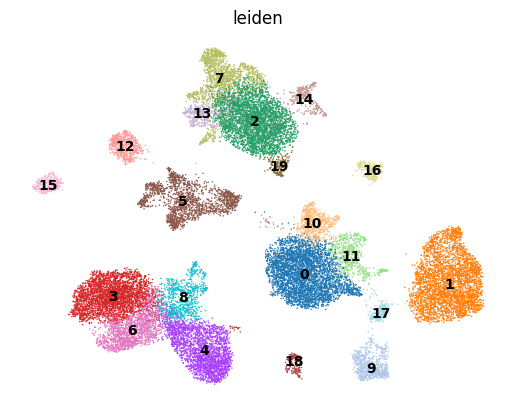

In [101]:
sc.pl.umap(data, color = ['leiden'], frameon = False, legend_loc = "on data")

KeyError: 'Could not find key PECAM1 in .var_names or .obs.columns.'

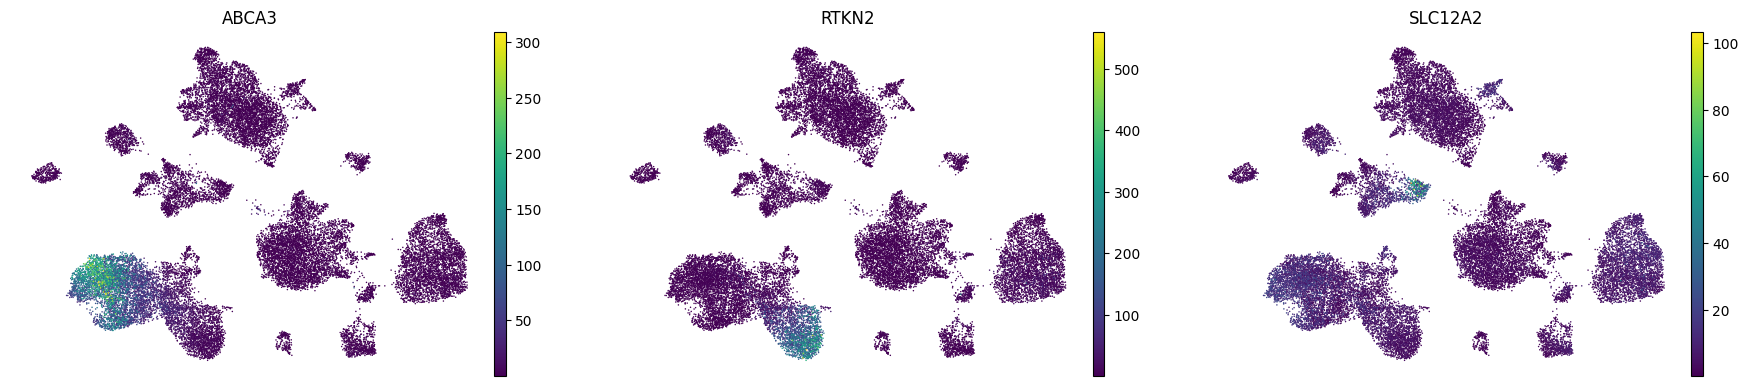

In [102]:
sc.pl.umap(data, color=['ABCA3', 'RTKN2', 'SLC12A2','PECAM1', 'PTPRC', 'MRC1', 'CCDC17', 'MUC16', 'PIGR', 'MARCO', 'SCGB1A1'], frameon=False, layer = 'scvi_normalized')

In [103]:
markers[markers.names == 'CCDC17']

,group,names,scores,logfoldchanges,pvals,pvals_adj
368594,15,CCDC17,11.023144,8.380796,3.707932e-24,2.969370e-23


In [104]:
markers_scvi[markers_scvi.index == "PTPRC"]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
PTPRC,0.9906,0.0094,4.6576,0.0309,0.00215,0.008408,0.25,6.284928,6.977527,2.967449,...,2.406326,0.345748,0.849603,0.153109,328.274323,20.844433,True,1 vs Rest,1,Rest


In [105]:
dicto = {
    "0":"CD45",
    "1":"Macrophages",
    "2":"Pulmonary alveolar type I cells",
    "3":"Ionocytes",
    "4":"Pulmonary alveolar type II cells",
    "5":"Macrophages",
    "6":"NIL",
    "7":"NIL",
    "8":"NIL",
    "9":"NIL",
    "10":"Airway goblet cells",
    "11":"NIL",
    "12":"NIL",
    "13":"Ciliated cells",
    "14":"NIL"
}

In [106]:
data.obs['cell_type'] = data.obs.leiden.map(dicto)

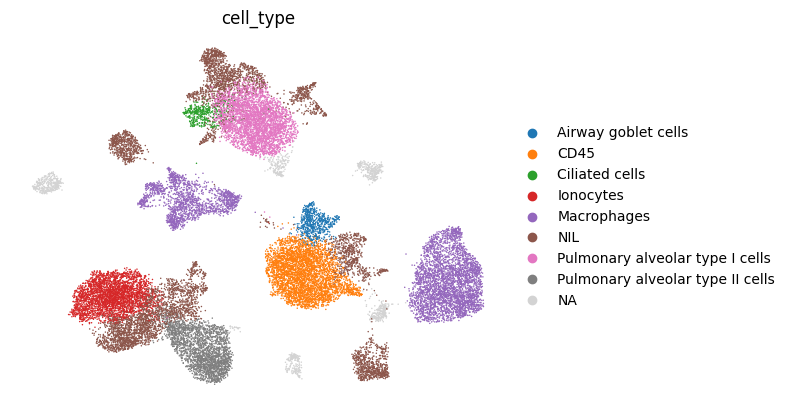

In [107]:
sc.pl.umap(data, color = ['cell_type'], frameon=False)

In [108]:
data.uns['scvi_markers'] = markers_scvi
data.uns['markers'] = markers

In [109]:
model.save('model.model')

In [110]:
data.obs.Sample.unique().tolist()

['C52ctr', 'L19cov', 'L17cov', 'L18cov', 'L22cov', 'C51ctr']

In [111]:
def map_contd(x):
  if 'cov' in x:
    return "COVID19"
  else:
    return 'control'
data.obs['condition'] = data.obs.Sample.map(map_contd)
data.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type,condition
CTGGTCTTCCATGCAA-1_2,C52ctr,False,2339,2339,7657.0,0.0,0.0,2.0,0.026120,0,0,3,6.161429,Ionocytes,control
AGGATAAAGCCGCACT-1_2,C52ctr,False,2536,2536,7023.0,0.0,0.0,18.0,0.256301,0,0,6,5.434783,NIL,control
GGGAGATCAGCAGTCC-1_2,C52ctr,False,2745,2745,6757.0,0.0,0.0,13.0,0.192393,0,0,10,4.945598,Airway goblet cells,control
TACCTGCAGCATCCCG-1_2,C52ctr,False,2433,2433,6663.0,0.0,0.0,6.0,0.090050,0,0,3,6.811989,Ionocytes,control
TATATCCAGCTCCCTT-1_2,C52ctr,False,2460,2460,6562.0,0.0,0.0,5.0,0.076196,0,0,3,7.423905,Ionocytes,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,C51ctr,False,355,355,410.0,0.0,0.0,0.0,0.000000,0,0,15,119.047623,NaN,control
CACTGGGGTCTACGTA-1_1,C51ctr,False,346,346,403.0,0.0,0.0,0.0,0.000000,0,0,4,142.857147,Pulmonary alveolar type II cells,control
CATACTTGTAGAGGAA-1_1,C51ctr,False,360,360,410.0,0.0,0.0,0.0,0.000000,0,0,1,243.902435,Macrophages,control
TTTGGTTTCCACGGAC-1_1,C51ctr,False,299,299,405.0,0.0,0.0,2.0,0.493827,0,0,5,133.333344,Macrophages,control


In [112]:
num_tot_cells = data.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

<ipython-input-112-b77f6031b458>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_tot_cells = data.obs.groupby(['Sample']).count()


{'C51ctr': 5960,
 'C52ctr': 4415,
 'L17cov': 4341,
 'L18cov': 2633,
 'L19cov': 2429,
 'L22cov': 6390}

In [113]:
cell_type_counts = data.obs.groupby(['Sample', 'condition', 'cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis=1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

<ipython-input-113-c35cf7f136b2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = data.obs.groupby(['Sample', 'condition', 'cell_type']).count()


,Sample,condition,cell_type,doublet
0,C51ctr,control,Airway goblet cells,124
1,C51ctr,control,CD45,276
2,C51ctr,control,Ciliated cells,58
3,C51ctr,control,Ionocytes,606
4,C51ctr,control,Macrophages,2200
5,C51ctr,control,NIL,1385
6,C51ctr,control,Pulmonary alveolar type I cells,12
7,C51ctr,control,Pulmonary alveolar type II cells,841
8,C52ctr,control,Airway goblet cells,317
9,C52ctr,control,CD45,128


In [114]:
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)

In [115]:
cell_type_counts

,Sample,condition,cell_type,doublet,total_cells
0,C51ctr,control,Airway goblet cells,124,5960
1,C51ctr,control,CD45,276,5960
2,C51ctr,control,Ciliated cells,58,5960
3,C51ctr,control,Ionocytes,606,5960
4,C51ctr,control,Macrophages,2200,5960
5,C51ctr,control,NIL,1385,5960
6,C51ctr,control,Pulmonary alveolar type I cells,12,5960
7,C51ctr,control,Pulmonary alveolar type II cells,841,5960
8,C52ctr,control,Airway goblet cells,317,4415
9,C52ctr,control,CD45,128,4415


In [116]:
cell_type_counts['frequency'] = cell_type_counts.doublet / cell_type_counts.total_cells
cell_type_counts

,Sample,condition,cell_type,doublet,total_cells,frequency
0,C51ctr,control,Airway goblet cells,124,5960,0.020805
1,C51ctr,control,CD45,276,5960,0.046309
2,C51ctr,control,Ciliated cells,58,5960,0.009732
3,C51ctr,control,Ionocytes,606,5960,0.101678
4,C51ctr,control,Macrophages,2200,5960,0.369128
5,C51ctr,control,NIL,1385,5960,0.232383
6,C51ctr,control,Pulmonary alveolar type I cells,12,5960,0.002013
7,C51ctr,control,Pulmonary alveolar type II cells,841,5960,0.141107
8,C52ctr,control,Airway goblet cells,317,4415,0.071801
9,C52ctr,control,CD45,128,4415,0.028992


In [117]:
import matplotlib.pyplot as plt

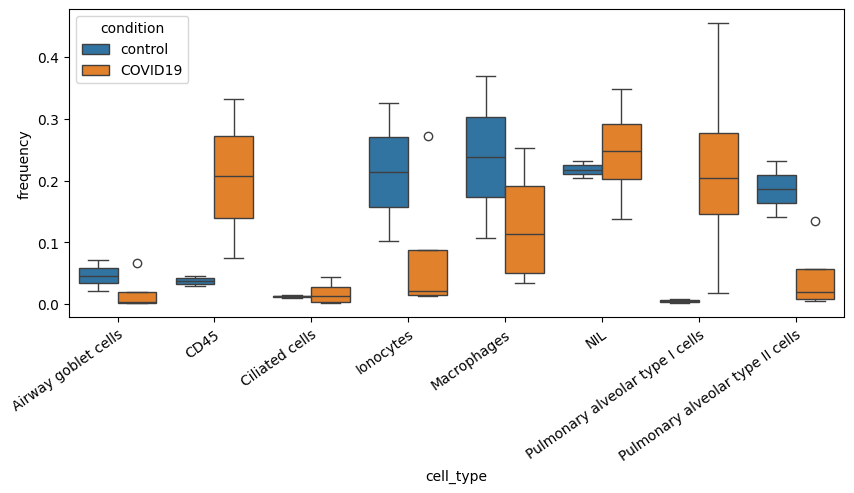

In [118]:
plt.figure(figsize=(10, 4))
ax = sns.boxplot(data = cell_type_counts, x = 'cell_type', y = 'frequency', hue = 'condition')
plt.xticks(rotation = 35, rotation_mode= 'anchor', ha='right')
plt.show()

In [119]:
!pip install tf-nightly
!pip install tfp-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.3/647.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.5 MB/s eta 0:00:00


In [120]:
subset = data[data.obs['cell_type'].isin(['CD45', 'Macrophages'])].copy()

In [121]:
import diffxpy.api as de

ModuleNotFoundError: No module named 'diffxpy'

In [122]:
model = scvi.model.SCVI.load("model.model", data)

INFO     File model.model/model.pt already downloaded                                                              


In [123]:
model

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False

In [124]:
scvi_de = model.differential_expression(
    idx1 = [data.obs['cell_type'] == 'Macrophages'],
    idx2 = [data.obs['cell_type'] == 'CD45']
)

DE...:   0%|          | 0/1 [00:00<?, ?it/s]

In [125]:
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
SLC16A10,0.9966,0.0034,-5.680571,2.187092e-04,0.014757,0.003653,0.25,-6.654749,-6.716350,1.912175,-12.429593,1.167297,0.007036,2.355964,0.005324,0.668964,0.595981,170.376328,True
CTSB,0.9962,0.0038,-5.568944,1.504848e-04,0.009011,0.003653,0.25,-6.458748,-6.441083,1.810403,-11.783588,-0.077128,0.005895,1.681679,0.004183,0.611450,0.341456,97.846169,True
MSR1,0.9952,0.0048,-5.334326,1.136233e-04,0.005879,0.003653,0.25,-6.666322,-6.722200,1.892631,-12.097342,1.168589,0.001331,0.936662,0.001141,0.458256,0.114445,56.069973,True
RBM47,0.9950,0.0050,-5.293303,6.994238e-04,0.007936,0.003653,0.25,-3.694971,-3.685681,1.210052,-9.101427,0.948709,0.005514,1.456667,0.005134,0.601643,0.408475,94.805267,True
KCNMA1,0.9944,0.0056,-5.179371,4.517444e-04,0.022540,0.003653,0.25,-6.190692,-6.181108,1.937729,-12.968494,1.511577,0.008937,3.666065,0.005134,0.768089,0.717692,244.553574,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C22orf31,0.0000,1.0000,-0.000000,1.365201e-07,0.000004,0.003653,0.25,-0.653746,-0.304044,0.869638,-5.677130,2.159284,0.000000,0.000265,0.000000,0.000265,0.000000,0.036307,False
FAM227A,0.0000,1.0000,-0.000000,1.798099e-05,0.000022,0.003653,0.25,-0.256873,-0.273650,1.536918,-5.211298,5.030753,0.001141,0.001855,0.001141,0.001855,0.106229,0.057555,False
PHF21B,0.0000,1.0000,-0.000000,3.262449e-06,0.000003,0.003653,0.25,0.037508,0.038425,1.013076,-5.671247,5.149451,0.000380,0.000795,0.000380,0.000795,0.058388,0.035477,False
MXRA5,0.0000,1.0000,-0.000000,2.035139e-06,0.000003,0.003653,0.25,-0.087280,0.007672,1.047565,-5.996352,5.348620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False


In [126]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
SLC1A3,0.9890,0.0110,-4.498798,0.000060,0.007025,0.003653,0.25,-7.431866,-7.504326,1.812415,-12.332060,0.979644,0.002662,1.226351,0.002282,0.521071,0.225726,80.832047,True
CD163,0.9886,0.0114,-4.462676,0.000073,0.006311,0.003653,0.25,-7.158483,-7.297958,2.046105,-12.970211,3.040999,0.001902,1.017501,0.001711,0.457196,0.146134,68.045334,True
GLUL,0.9932,0.0068,-4.984008,0.000149,0.009752,0.003653,0.25,-6.983974,-7.067018,2.078495,-12.475589,1.124777,0.006655,1.338457,0.005324,0.546515,0.392119,83.014137,True
MSR1,0.9952,0.0048,-5.334326,0.000114,0.005879,0.003653,0.25,-6.666322,-6.722200,1.892631,-12.097342,1.168589,0.001331,0.936662,0.001141,0.458256,0.114445,56.069973,True
SLC16A10,0.9966,0.0034,-5.680571,0.000219,0.014757,0.003653,0.25,-6.654749,-6.716350,1.912175,-12.429593,1.167297,0.007036,2.355964,0.005324,0.668964,0.595981,170.376328,True
CTSB,0.9962,0.0038,-5.568944,0.000150,0.009011,0.003653,0.25,-6.458748,-6.441083,1.810403,-11.783588,-0.077128,0.005895,1.681679,0.004183,0.611450,0.341456,97.846169,True
TFEC,0.9756,0.0244,-3.688469,0.000060,0.002866,0.003653,0.25,-6.452867,-6.541799,1.863147,-11.206873,1.858764,0.000761,0.385634,0.000761,0.275908,0.092054,24.499081,True
HS3ST2,0.9150,0.0850,-2.376273,0.000120,0.006710,0.003653,0.25,-6.377005,-6.507685,2.585025,-13.663936,3.424559,0.004754,1.019351,0.002472,0.230586,0.354336,67.168869,True
FTH1,0.9378,0.0622,-2.713182,0.000155,0.004742,0.003653,0.25,-6.234953,-6.494268,2.354848,-11.819080,3.353174,0.010078,0.745036,0.004944,0.371323,0.483770,45.682693,True
KCNMA1,0.9944,0.0056,-5.179371,0.000452,0.022540,0.003653,0.25,-6.190692,-6.181108,1.937729,-12.968494,1.511577,0.008937,3.666065,0.005134,0.768089,0.717692,244.553574,True


In [127]:
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | (scvi_de.raw_normalized_mean2) > .5]
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
SLC1A3,0.9890,0.0110,-4.498798,0.000060,0.007025,0.003653,0.25,-7.431866,-7.504326,1.812415,-12.332060,0.979644,0.002662,1.226351,0.002282,0.521071,0.225726,80.832047,True
CD163,0.9886,0.0114,-4.462676,0.000073,0.006311,0.003653,0.25,-7.158483,-7.297958,2.046105,-12.970211,3.040999,0.001902,1.017501,0.001711,0.457196,0.146134,68.045334,True
GLUL,0.9932,0.0068,-4.984008,0.000149,0.009752,0.003653,0.25,-6.983974,-7.067018,2.078495,-12.475589,1.124777,0.006655,1.338457,0.005324,0.546515,0.392119,83.014137,True
MSR1,0.9952,0.0048,-5.334326,0.000114,0.005879,0.003653,0.25,-6.666322,-6.722200,1.892631,-12.097342,1.168589,0.001331,0.936662,0.001141,0.458256,0.114445,56.069973,True
SLC16A10,0.9966,0.0034,-5.680571,0.000219,0.014757,0.003653,0.25,-6.654749,-6.716350,1.912175,-12.429593,1.167297,0.007036,2.355964,0.005324,0.668964,0.595981,170.376328,True
CTSB,0.9962,0.0038,-5.568944,0.000150,0.009011,0.003653,0.25,-6.458748,-6.441083,1.810403,-11.783588,-0.077128,0.005895,1.681679,0.004183,0.611450,0.341456,97.846169,True
TFEC,0.9756,0.0244,-3.688469,0.000060,0.002866,0.003653,0.25,-6.452867,-6.541799,1.863147,-11.206873,1.858764,0.000761,0.385634,0.000761,0.275908,0.092054,24.499081,True
HS3ST2,0.9150,0.0850,-2.376273,0.000120,0.006710,0.003653,0.25,-6.377005,-6.507685,2.585025,-13.663936,3.424559,0.004754,1.019351,0.002472,0.230586,0.354336,67.168869,True
FTH1,0.9378,0.0622,-2.713182,0.000155,0.004742,0.003653,0.25,-6.234953,-6.494268,2.354848,-11.819080,3.353174,0.010078,0.745036,0.004944,0.371323,0.483770,45.682693,True
KCNMA1,0.9944,0.0056,-5.179371,0.000452,0.022540,0.003653,0.25,-6.190692,-6.181108,1.937729,-12.968494,1.511577,0.008937,3.666065,0.005134,0.768089,0.717692,244.553574,True


In [130]:
genes_to_show = scvi_de[-15:].index.tolist() + scvi_de[:15].index.tolist()

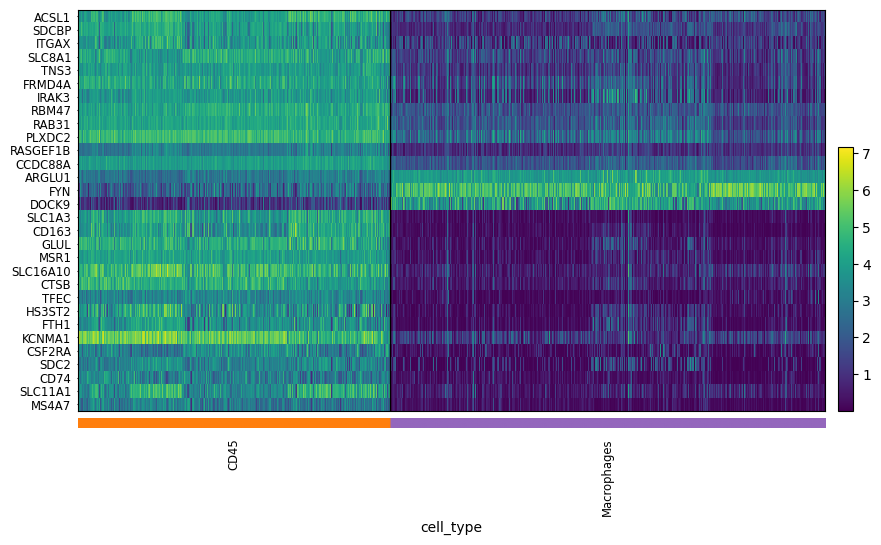

In [131]:
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, layer='scvi_normalized', log=True)

In [133]:
!pip install gseapy
import gseapy as gp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 12.0 MB/s eta 0:00:00


In [134]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [135]:
subset

AnnData object with n_obs × n_vars = 9032 × 2000
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type', 'condition'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Sample_colors', 'rank_genes_groups', 'cell_type_colors', 'scvi_markers', 'markers'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'distances', 'connectivities'

In [138]:
scvi_de.index.tolist()

['SLC1A3',
 'CD163',
 'GLUL',
 'MSR1',
 'SLC16A10',
 'CTSB',
 'TFEC',
 'HS3ST2',
 'FTH1',
 'KCNMA1',
 'CSF2RA',
 'SDC2',
 'CD74',
 'SLC11A1',
 'MS4A7',
 'KYNU',
 'PSAP',
 'KMO',
 'EPB41L3',
 'MRC1',
 'TFRC',
 'GK',
 'CPVL',
 'SLCO2B1',
 'PLAUR',
 'ACSL1',
 'SDCBP',
 'ITGAX',
 'SLC8A1',
 'TNS3',
 'FRMD4A',
 'IRAK3',
 'RBM47',
 'RAB31',
 'PLXDC2',
 'RASGEF1B',
 'CCDC88A',
 'ARGLU1',
 'FYN',
 'DOCK9']

In [139]:
enr = gp.enrichr(gene_list = scvi_de.index.tolist(),
                 gene_sets = ['KEGG_2021_Human'],
                 organism = 'human',
                 outdir=None,
                 background = subset.var_names.to_list())

In [141]:
enr.results

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Ferroptosis,0.000808,0.058951,0,0,22.621622,161.099970,TFRC;ACSL1;FTH1
1,KEGG_2021_Human,Lysosome,0.004151,0.101019,0,0,11.270270,61.809459,SLC11A1;PSAP;CTSB
2,KEGG_2021_Human,Tuberculosis,0.004151,0.101019,0,0,11.270270,61.809459,CD74;MRC1;ITGAX
3,KEGG_2021_Human,Tryptophan metabolism,0.007689,0.140320,0,0,20.578947,100.178242,KYNU;KMO
4,KEGG_2021_Human,Necroptosis,0.015862,0.182499,0,0,12.842105,53.215706,FTH1;GLUL
...,...,...,...,...,...,...,...,...,...
68,KEGG_2021_Human,Axon guidance,0.519920,0.542202,0,0,1.410256,0.922421,FYN
69,KEGG_2021_Human,Cell adhesion molecules,0.519920,0.542202,0,0,1.410256,0.922421,SDC2
70,KEGG_2021_Human,Cytokine-cytokine receptor interaction,0.617387,0.634778,0,0,1.066890,0.514517,CSF2RA
71,KEGG_2021_Human,Focal adhesion,0.655034,0.664131,0,0,0.959779,0.406052,FYN


In [144]:
sc.pl.violin(subset[subset.obs.cell_type == 'CD45'], 'CD45', groupby='condition')

KeyError: "Could not find keys ['CD45'] in columns of `adata.obs` or in adata.raw.var_names."

In [143]:
data.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type,condition
CTGGTCTTCCATGCAA-1_2,C52ctr,False,2339,2339,7657.0,0.0,0.0,2.0,0.026120,0,0,3,6.161429,Ionocytes,control
AGGATAAAGCCGCACT-1_2,C52ctr,False,2536,2536,7023.0,0.0,0.0,18.0,0.256301,0,0,6,5.434783,NIL,control
GGGAGATCAGCAGTCC-1_2,C52ctr,False,2745,2745,6757.0,0.0,0.0,13.0,0.192393,0,0,10,4.945598,Airway goblet cells,control
TACCTGCAGCATCCCG-1_2,C52ctr,False,2433,2433,6663.0,0.0,0.0,6.0,0.090050,0,0,3,6.811989,Ionocytes,control
TATATCCAGCTCCCTT-1_2,C52ctr,False,2460,2460,6562.0,0.0,0.0,5.0,0.076196,0,0,3,7.423905,Ionocytes,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,C51ctr,False,355,355,410.0,0.0,0.0,0.0,0.000000,0,0,15,119.047623,NaN,control
CACTGGGGTCTACGTA-1_1,C51ctr,False,346,346,403.0,0.0,0.0,0.0,0.000000,0,0,4,142.857147,Pulmonary alveolar type II cells,control
CATACTTGTAGAGGAA-1_1,C51ctr,False,360,360,410.0,0.0,0.0,0.0,0.000000,0,0,1,243.902435,Macrophages,control
TTTGGTTTCCACGGAC-1_1,C51ctr,False,299,299,405.0,0.0,0.0,2.0,0.493827,0,0,5,133.333344,Macrophages,control
